# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


### Initial thoughts:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Do movies released during summer or christmas have better revenues?
4. How are actual revenue and popularity related i.e. if a movie is popular does it make higher revenue
5. which is the most popular movie in 2015, 2014 and so on
6. analyze at least one dependent variable and three independent variables in your investigation
7. Which is the lowest budget movie with most popularity , is the popularity higher than the those with higher budget, In other words can a movie be popular and successful with lower budget
8. Are popular movies also ones with higher revenues
9. Not clear, if revenue info is that useful since it includes expenses, profit sould have been a better indicator

<a id='wrangling'></a>
## Data Wrangling

> **Overview**: This section shows my initial study of the dataset, making sure it is loading correctly.I looked at various methods to understand datatypes,missing values, duplicates. I made various decisions regarding dropping columns and rows based based on the study.

### General Properties

In [3]:
df = pd.read_csv(r'C:\Users\remya\Downloads\DAND\tmdb-movies.csv' , sep=',')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# check for duplicate rows and remove them except keep the first one
print(df['id'].nunique())
print(df['original_title'].nunique())
# check if any columns can be dropped without problems

10865
10571


In [6]:
#check for missing data in columns and how they affect the data quality
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

### Data Cleaning Steps

#### Step1: Removing duplicates

In [8]:
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

#### Step2:  Remove zero revenue rows

In [9]:
#since many of the questions are tied to revenues and therefore the ones with zero does not make sense
df.drop(df[df.revenue == 0].index , inplace=True)

In [10]:
#check drop was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 21 columns):
id                      4850 non-null int64
imdb_id                 4850 non-null object
popularity              4850 non-null float64
budget                  4850 non-null int64
revenue                 4850 non-null int64
original_title          4850 non-null object
cast                    4845 non-null object
homepage                1665 non-null object
director                4849 non-null object
tagline                 4386 non-null object
keywords                4615 non-null object
overview                4850 non-null object
runtime                 4850 non-null int64
genres                  4850 non-null object
production_companies    4754 non-null object
release_date            4850 non-null object
vote_count              4850 non-null int64
vote_average            4850 non-null float64
release_year            4850 non-null int64
budget_adj              4850 non-null flo

#### Step3:Drop redundant columns

In [11]:
# In this dataset it is better to use the inflation based revenue/budget as it is more stanardized than normal values.
df.drop(['budget', 'revenue'], axis=1, inplace=True)

In [12]:
# confirm changes
df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
#### Step4: Save the modified dataset into another csv

In [14]:
df.to_csv(r'C:\users\remya\Downloads\DAND\tmdb_edited.csv', index=False)

In [15]:
df.shape

(4850, 19)

In [16]:
df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Number of movies in each Genre? (Top 7))

In [17]:
def get_primary_genre(genre):
    if(genre.find("|")):
        primary_genre = genre.split('|',1)[0].lower()
    else:
        primary_genre = genre.lower()
    return primary_genre

In [18]:
# Add new column primary_genres to the dataframe
primary_genres = []
for genre in df['genres']:
    primary_genres.append(get_primary_genre(genre))
df['primary_genres'] = primary_genres

In [19]:
df.head(4)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,action
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,action
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,adventure
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,action


In [20]:
#drop multi genres column for simplicity
df.drop(['genres'], axis=1, inplace=True)

In [21]:
df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,action


In [22]:
df.to_csv(r'C:\users\remya\Downloads\DAND\tmdb_v2.csv', index=False)

In [23]:
df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,action


In [24]:
df_genre_id  = pd.DataFrame(df.groupby(['primary_genres'])['id'].count())

In [25]:
df_genre_id_top7 = df_genre_id.nlargest(7,'id')

In [26]:
df_genre_id_top7.id

primary_genres
drama        1157
comedy       1050
action        825
adventure     353
horror        324
crime         207
thriller      199
Name: id, dtype: int64

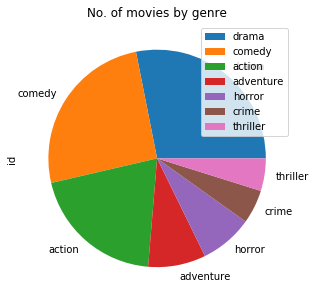

In [61]:
df_genre_id_top7.plot.pie(y='id', figsize=(5, 5), title='No. of movies by genre', legend=True)

**Answer Explanation** As evident from the pie chart, highest number of movies were in Drama genre.Right behind are comedy and action categories.

### Research Question 2(Relationship between all numerical columns in the dataset?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CBF2B20F0>,
      dtype=object)

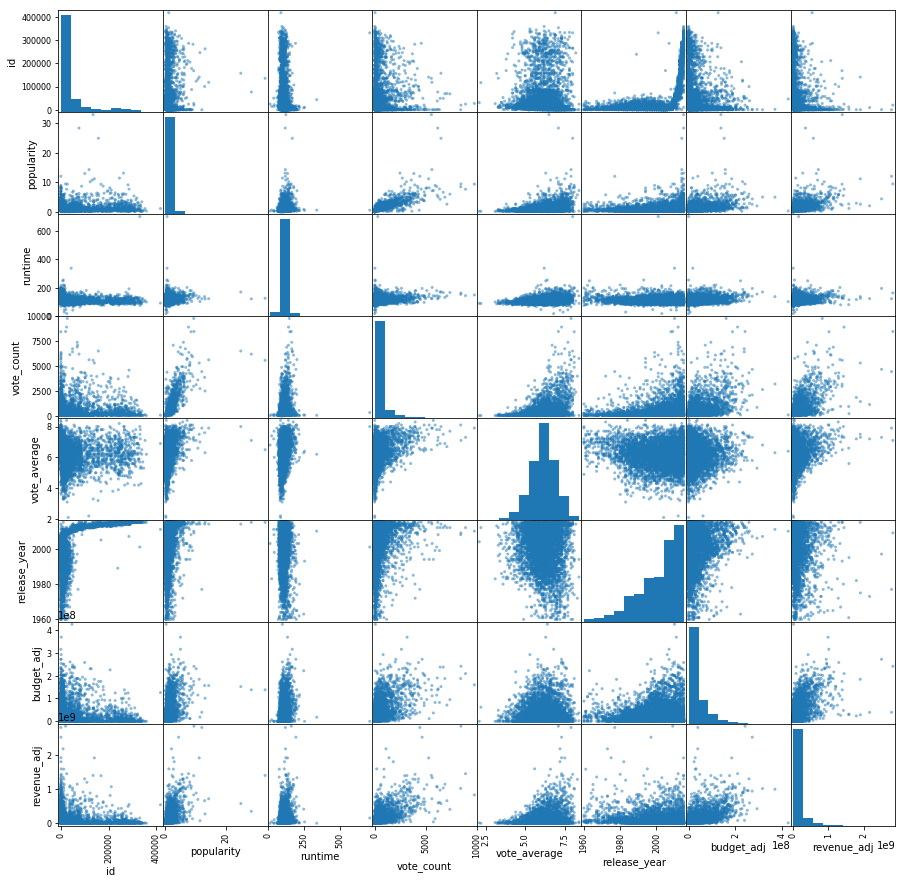

In [28]:
pd.plotting.scatter_matrix(df, figsize=(15,15))

**Answer Explanation** I wanted to plot this to gain a high level overview of various relationships within the numerical data columns,so that I could further drill if I saw something interesting. But I am not sure what meaning these hold.

### Research Question 3(Relationship between popularity and Adjusted revenues?)

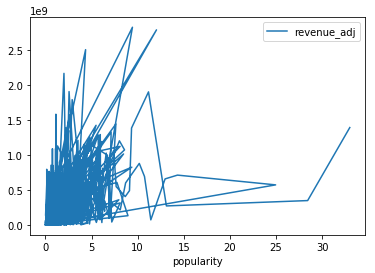

In [29]:
df.plot(x='popularity', y='revenue_adj', kind='line')

**Answer Explanation** This clearly demonstrates that just because a movie is popular, does not mean it has the highest revenue. I thought it would.Interesting!

### Research Question 4(Relationship between popularity and genre)

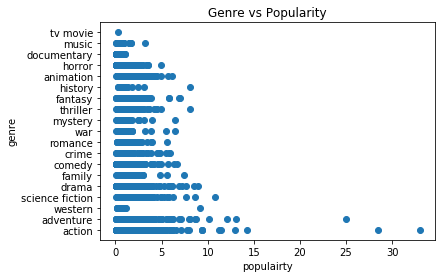

In [57]:
plt.scatter(df['popularity'], df['primary_genres'])
plt.xlabel('populairty')
plt.ylabel('genre')
plt.title('Genre vs Popularity')
plt.show() 

**Answer Explanation** Looks like the movies with highest popularities are actually outliers. Most of the movies range from 0 to 15 where as the 3 shown have popularity around 25 to 35. Will need further study.

### Research Question 5(Number of movies breakdown per quarter)

In [31]:
def get_quarter(month):
    if(1 <= month <= 3):
        return '1st'
    elif(4 <= month <= 6):
        return '2nd'
    elif(7 <= month <= 9):
        return '3rd'
    else:
        return '4th'

In [32]:
#covert from string to actual date time column
df['release_date'] = pd.to_datetime(df['release_date'])

In [33]:
df['quarter'] = df['release_date'].dt.month.apply(lambda x: get_quarter(x))

In [34]:
df.to_csv(r'C:\users\remya\Downloads\DAND\tmdb_v3.csv', index=False)

In [35]:
df.head(2)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres,quarter
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,action,2nd
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,action,2nd


In [36]:
df.groupby(['quarter'])['id'].count()

quarter
1st     997
2nd    1125
3rd    1424
4th    1304
Name: id, dtype: int64

In [37]:
df_quarter_id  = pd.DataFrame(df.groupby(['quarter'])['id'].count())

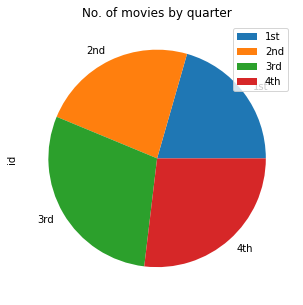

In [59]:
df_quarter_id.plot.pie(y='id', figsize=(5, 5), title='No. of movies by quarter')

**Answer Explanation** This was done to see, if most movies were made in summer since it is time of school vacation and can attract more movie goers.That assumption does look true. Closely followed by 4th quarter, since there are multiple holidays during that season. 

### Research Question 6(Top 10 movies of all time by popularity)

In [39]:
# First sort the dataframe by popularity and release year in descending order
# Then group by the resulting dataset on Release year and make a list of first ones
df_pop_year = df.sort_values(['popularity' ,'release_year'],ascending=False).groupby('release_year').head(1)

In [40]:
#Pick columns that are most relevant
df_pop_year = df_pop_year[['popularity','original_title','release_year', 'revenue_adj']]

In [41]:
#Top 10 popular movies of all time
df_pop_year.nlargest(10,'popularity')

,popularity,original_title,release_year,revenue_adj
0,32.985763,Jurassic World,2015,1.392446e+09
629,24.949134,Interstellar,2014,5.726906e+08
1329,12.037933,Star Wars,1977,2.789712e+09
1386,9.432768,Avatar,2009,2.827124e+09
1919,9.363643,Inception,2010,8.255000e+08
2409,8.947905,Fight Club,1999,1.320229e+08
2633,8.575419,The Lord of the Rings: The Fellowship of the Ring,2001,1.073080e+09
2875,8.466668,The Dark Knight,2008,1.014733e+09
3911,8.095275,The Lord of the Rings: The Two Towers,2002,1.122902e+09
4177,8.093754,Pulp Fiction,1994,3.147131e+08


**Answer Explanation** Jurassic world is the most popular movie ever, according to this dataset. But Forrest Gump has the highest revenue. This actually made me question the difference between revenue and profit. Since revenue contains expenses, I am not sure if it is a good measure to compare. 

### Research Question 7(The year in which most movies were made)

In [42]:
# Data subset with no. of movies grouped by year
df_year_id  = pd.DataFrame(df.groupby(['release_year'])['id'].count())

In [43]:
df_year_id

,id
release_year,
1960,7
1961,10
1962,9
1963,7
1964,8
1965,5
1966,5
1967,14
1968,12


In [44]:
#year in which most movies were made
df_year_id.nlargest(1,'id')

,id
release_year,
2013,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CC3758B38>]],
      dtype=object)

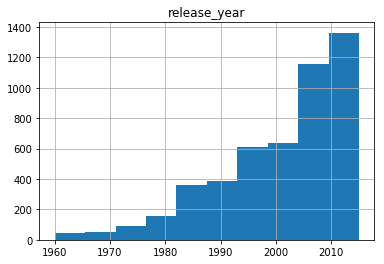

In [64]:
#A variation of the same question where it shows a glimpse of number of movies made each year
df.hist(column='release_year')

**Answer Explanation** I think now a days it is getting much easier to make movies. From the graph it shows steady increase in the number of movies made each year. Technological advancements must have helped.But why do we need so many? In this case, I like quality over quantity for sure.

### Research Question 8(Order genres by popularity)

In [46]:
# First sort the dataframe by popularity and genre in descending order
# Then group by the resulting dataset on primary genre and make a list of top ones
df_pop_genre = df.sort_values(['popularity' ,'primary_genres'],ascending=False).groupby(['primary_genres']).head(1)

In [47]:
#Pick columns that are most important
df_pop_genre = df_pop_genre[['popularity','primary_genres', 'release_year']]

In [48]:
#Each Genre ordered by Popularity
df_pop_genre

,popularity,primary_genres,release_year
0,32.985763,action,2015
629,24.949134,adventure,2014
633,10.739009,science fiction,2014
5,9.110700,western,2015
2409,8.947905,drama,1999
636,8.110711,history,2014
4177,8.093754,thriller,1994
8,7.404165,family,2015
4362,7.031452,fantasy,2012
4179,6.715966,comedy,1994


**Answer Explanation** According to the result, most popular genre is action. As we saw earlier the popularity being so high makes it mostly an outlier. Therefore, I am inclined to believe science fiction is the more reliable and better candidate for highest popularity genre.

<a id='conclusions'></a>
## Conclusions

> **Insights**: When I started working with the dataset, I felt I did not have good questions to ask. Nonetheless I came up with some as seen at the top. As I spent time wrangling, I got ideas regarding primary genre and quarter columns. Those led to a couple of interesting findings. As explained in lectures, the data wrangling phase and EDA were intertwined and I kept going back and forth. I also ended up answering different questions than I intially thought of. I found that having domain knowledge would be so important in-order to get most out of the data. Alternately, by studying data you can gain the domain knowledge you need to answer the questions you came up with. I felt I was writing SQL queries but in python to gain various insights from the data. Overall I enjoyed working with this dataset!

> **Challenges**: The dataset had problems for sure. As I did in the cleaning steps, I had to remove data with zero revenue, budget. The actual usable data was limited especially the numerical columns.I am not sure the there is enough to go on based on popularity, revenue, budget etc. Also from the vote_count I don't think the dataset is representative of the population. The full scatter plot was hard to understand. I was hoping to understand if there is correlation between popularity and properties of a movie. But I am not sure there is.

> **Going forward**: I think in-order to fully appreciate what this dataset holds, it would be essential to apply statistics and ML models. For example, we might be able to analyze the sentiments that each tagline or overview presents to the readers. 

<a id='references'></a>
## References
<ul>
    <li><a href="https://www.udacity.com/">Udacity courses, forums</a></li>
    <li><a href="https://stackoverflow.com/">Stack overflow for python, pandas debugging</a></li>
    <li><a href="http://pandas.pydata.org/pandas-docs/stable/">Pandas documentation</a></li>
    <li><a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html">Pyplot reference</a></li>
</ul>